In [1]:
import pandas as pd
df = pd.read_csv("rent.csv")
print(df.shape) # print rows, columns
df.head(2)       # dump first 2 rows

(49352, 15)


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,['https://photos.renthop.com/2/7211212_1ed4542...,3000,792 Metropolitan Avenue
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"['Doorman', 'Elevator', 'Fitness Center', 'Cat...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,['https://photos.renthop.com/2/7150865_be3306c...,5465,808 Columbus Avenue


In [2]:
df.head(2).T

,0,1
bathrooms,1.5,1
bedrooms,3,2
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130
created,2016-06-24 07:54:24,2016-06-12 12:19:27
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,
display_address,Metropolitan Avenue,Columbus Avenue
features,[],"['Doorman', 'Elevator', 'Fitness Center', 'Cat..."
interest_level,medium,low
latitude,40.7145,40.7947
listing_id,7211212,7150865


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        47906 non-null object
display_address    49217 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49342 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 5.6+ MB


In [4]:
df_num = df[['bathrooms', 'bedrooms', 'longitude', 'latitude', 'price']]
df_num.head(2)

,bathrooms,bedrooms,longitude,latitude,price
0,1.5,3,-73.9425,40.7145,3000
1,1.0,2,-73.9667,40.7947,5465


In [5]:
print(df_num.isnull().any())

bathrooms    False
bedrooms     False
longitude    False
latitude     False
price        False
dtype: bool


In [6]:
X_train = df_num.drop('price', axis=1)
y_train = df_num['price']

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1)        # train w/all CPU core

In [8]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [9]:
r2 = rf.score(X_train, y_train)
print( f"{r2:.4f}" )

0.9083


In [10]:
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           oob_score=True)   # get error estimate
rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

OOB score -0.0491


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

X, y = df_num.drop('price', axis=1), df_num['price']

errors = []
print(f"Validation MAE trials:", end='')
for i in range(7):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.20)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_predicted = rf.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f" ${e:.0f}", end='')
    errors.append(e)
print()
noisy_avg_mae = np.mean(errors)
print(f"Average validation MAE ${noisy_avg_mae:.0f}")

Validation MAE trials: $371 $369 $417 $445 $588 $369 $557
Average validation MAE $445


In [12]:
df_num.describe()

,bathrooms,bedrooms,longitude,latitude,price
count,49352.00000,49352.000000,49352.000000,49352.000000,4.935200e+04
mean,1.21218,1.541640,-73.955716,40.741545,3.830174e+03
std,0.50142,1.115018,1.177912,0.638535,2.206687e+04
min,0.00000,0.000000,-118.271000,0.000000,4.300000e+01
25%,1.00000,1.000000,-73.991700,40.728300,2.500000e+03
50%,1.00000,1.000000,-73.977900,40.751800,3.150000e+03
75%,1.00000,2.000000,-73.954800,40.774300,4.100000e+03
max,10.00000,8.000000,0.000000,44.883500,4.490000e+06


In [13]:
print(df_num.price.sort_values(ascending=False).head(10))

19558    4490000
9590     1150000
30689    1070000
29665    1070000
10581     135000
25538     111111
45674     100000
29082      90000
7336       85000
47995      80000
Name: price, dtype: int64


In [14]:
print(df_num.bathrooms.value_counts())

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
10.0        1
7.0         1
Name: bathrooms, dtype: int64


In [15]:
print(df_num.bedrooms.value_counts())

1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64


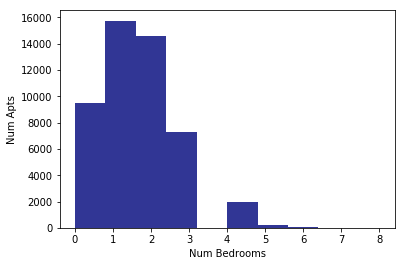

In [24]:
bookcolors = {
         'crimson': '#a50026', 'red': '#d73027',
         'redorange': '#f46d43', 'orange': '#fdae61',
         'yellow': '#fee090', 'sky': '#e0f3f8',
         'babyblue': '#abd9e9', 'lightblue': '#74add1',
         'blue': '#4575b4', 'purple': '#313695'
     }
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.set_xlabel('Num Bedrooms')
ax.set_ylabel('Num Apts')
ax.hist(df_num.bedrooms, color=bookcolors['purple'])
plt.show()

In [25]:
print(len(df[(df.longitude==0.0) & (df.latitude==0.0)]))

12


In [26]:
df_local = df[(df.latitude>40.764) & (df.latitude<40.7678) &
              (df.longitude>=-73.9844) & (df.longitude<=-73.9842) &
           (df.bathrooms==1) & (df.bedrooms==1)]
df_local[['bedrooms','bathrooms','street_address','price']].sort_values('price')

,bedrooms,bathrooms,street_address,price
39939,1,1.0,west 54 st & 8 ave,2300
21711,1,1.0,300 West 55th Street,2400
15352,1,1.0,300 West 55th Street,3350
48274,1,1.0,300 West 55th Street,3400
29665,1,1.0,333 West 57th Street,1070000
30689,1,1.0,333 West 57th Street,1070000


In [27]:
# filter all records (training/testing)
df_clean = df_num[(df_num.price>1_000) & (df_num.price<10_000)]

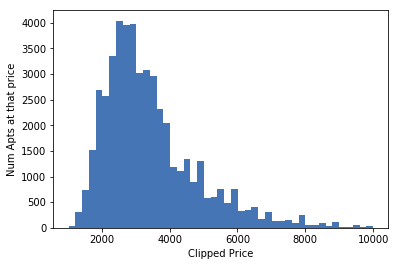

In [28]:
fig,ax = plt.subplots()
ax.set_xlabel('Clipped Price')
ax.set_ylabel('Num Apts at that price')
ax.hist(df_clean.price, bins=45, color=bookcolors['blue'])
plt.show()

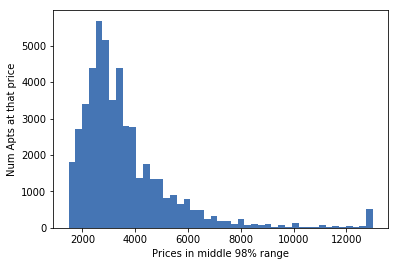

In [29]:
upper, lower = np.percentile(df.price, [1,99]) # find middle 98% of prices
clipped = np.clip(df.price, upper, lower)
fig,ax = plt.subplots()
ax.set_xlabel('Prices in middle 98% range')
ax.set_ylabel('Num Apts at that price')
ax.hist(clipped, bins=45, color=bookcolors['blue'])
plt.show()

In [30]:
df_missing = df_clean[(df_clean.longitude==0) | (df_clean.latitude==0)]
print(len(df_missing))

11


In [31]:
df_clean = df_clean[(df_clean.longitude!=0) | (df_clean.latitude!=0)]

In [32]:
df_clean = df_clean[(df_clean['latitude']>40.55) &
                    (df_clean['latitude']<40.94) &
                    (df_clean['longitude']>-74.1) &
                    (df_clean['longitude']<-73.67)]

In [33]:
X, y = df_clean.drop('price', axis=1), df_clean['price']
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,        # parallelize
                           oob_score=True)   # get error estimate
rf.fit(X, y)
clean_oob_r2 = rf.oob_score_
print(f"Validation OOB score {clean_oob_r2:.4f}")

Validation OOB score 0.8678


In [34]:
X, y = df_num.drop('price', axis=1), df_num['price']
y_log = np.log(y) # apply log to each price

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X, y_log)
log_oob_r2 = rf.oob_score_
print(f"OOB R^2 score for log(price) {log_oob_r2:.4f}")

OOB R^2 score for log(price) 0.8770
